# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_train.csv')

In [3]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df.shape

(69999, 172)

In [5]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
df.mode().head(1)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3651.0,0.0,0.0,0.0,0.0


In [9]:
for column in df:
    df[column]=df[column].fillna(df[column].mode()[0])

In [10]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,1.0,1.0,1.0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,1.0,1.0,1.0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,1.0,1.0,1.0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,1.0,1.0,1.0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [11]:
df.isna().sum()

id                   0
circle_id            0
loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 172, dtype: int64

In [12]:
df.isnull().any().sum()

0

In [13]:
df.select_dtypes(include=object)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,6/30/2014,7/31/2014,8/31/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,6/30/2014,7/8/2014,8/31/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,6/30/2014,7/31/2014,8/31/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,6/30/2014,7/31/2014,8/31/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,6/30/2014,7/31/2014,8/31/2014
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,6/30/2014,7/31/2014,8/31/2014
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [14]:
df[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']]=df[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']].apply(pd.to_datetime)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: datetime64[ns](9), float64(135), int64(28)
memory usage: 91.9 MB


In [16]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,...,0,0,1.0,1.0,1.0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.000,122.787,...,0,0,1.0,1.0,1.0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,60.806,103.176,...,0,0,1.0,1.0,1.0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,156.362,205.260,...,0,0,1.0,1.0,1.0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [17]:
df['last_date_of_month_6_Day'] = df['last_date_of_month_6'].dt.day
df['last_date_of_month_6_month'] = df['last_date_of_month_6'].dt.month
df['last_date_of_month_6_year'] = df['last_date_of_month_6'].dt.year

df['last_date_of_month_7_Day'] = df['last_date_of_month_7'].dt.day
df['last_date_of_month_7_month'] = df['last_date_of_month_7'].dt.month
df['last_date_of_month_7_year'] = df['last_date_of_month_7'].dt.year

df['last_date_of_month_8_Day'] = df['last_date_of_month_8'].dt.day
df['last_date_of_month_8_month'] = df['last_date_of_month_8'].dt.month
df['last_date_of_month_8_year'] = df['last_date_of_month_8'].dt.year

df['date_of_last_rech_6_Day'] = df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_6_month'] = df['date_of_last_rech_6'].dt.month
df['date_of_last_rech_6_year'] = df['date_of_last_rech_6'].dt.year

df['date_of_last_rech_7_Day'] = df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_7_month'] = df['date_of_last_rech_7'].dt.month
df['date_of_last_rech_7_year'] = df['date_of_last_rech_7'].dt.year

df['date_of_last_rech_8_Day'] = df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_8_month'] = df['date_of_last_rech_8'].dt.month
df['date_of_last_rech_8_year'] = df['date_of_last_rech_8'].dt.year

df['date_of_last_rech_data_6_Day'] = df['date_of_last_rech_data_6'].dt.day
df['date_of_last_rech_data_6_month'] = df['date_of_last_rech_data_6'].dt.month
df['date_of_last_rech_data_6_year'] = df['date_of_last_rech_data_6'].dt.year

df['date_of_last_rech_data_7_Day'] = df['date_of_last_rech_data_7'].dt.day
df['date_of_last_rech_data_7_month'] = df['date_of_last_rech_data_7'].dt.month
df['date_of_last_rech_data_7_year'] = df['date_of_last_rech_data_7'].dt.year

df['date_of_last_rech_data_8_Day'] = df['date_of_last_rech_data_8'].dt.day
df['date_of_last_rech_data_8_month'] = df['date_of_last_rech_data_8'].dt.month
df['date_of_last_rech_data_8_year'] = df['date_of_last_rech_data_8'].dt.year

In [18]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,date_of_last_rech_8_year,date_of_last_rech_data_6_Day,date_of_last_rech_data_6_month,date_of_last_rech_data_6_year,date_of_last_rech_data_7_Day,date_of_last_rech_data_7_month,date_of_last_rech_data_7_year,date_of_last_rech_data_8_Day,date_of_last_rech_data_8_month,date_of_last_rech_data_8_year
0,0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,...,2014,30,6,2014,31,7,2014,31,8,2014
1,1,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.000,122.787,...,2014,30,6,2014,8,7,2014,31,8,2014
2,2,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,60.806,103.176,...,2014,30,6,2014,31,7,2014,31,8,2014
3,3,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,156.362,205.260,...,2014,30,6,2014,31,7,2014,31,8,2014
4,4,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,240.708,128.191,...,2014,25,6,2014,23,7,2014,20,8,2014


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 199 entries, id to date_of_last_rech_data_8_year
dtypes: datetime64[ns](9), float64(135), int64(55)
memory usage: 106.3 MB


In [20]:
df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [21]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,date_of_last_rech_8_year,date_of_last_rech_data_6_Day,date_of_last_rech_data_6_month,date_of_last_rech_data_6_year,date_of_last_rech_data_7_Day,date_of_last_rech_data_7_month,date_of_last_rech_data_7_year,date_of_last_rech_data_8_Day,date_of_last_rech_data_8_month,date_of_last_rech_data_8_year
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,2014,30,6,2014,31,7,2014,31,8,2014
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,2014,30,6,2014,8,7,2014,31,8,2014
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,2014,30,6,2014,31,7,2014,31,8,2014
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,2014,30,6,2014,31,7,2014,31,8,2014
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,2014,25,6,2014,23,7,2014,20,8,2014


In [22]:
df.shape

(69999, 190)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 190 entries, id to date_of_last_rech_data_8_year
dtypes: float64(135), int64(55)
memory usage: 101.5 MB


In [24]:
df['churn_probability'].unique()

array([0, 1], dtype=int64)

In [25]:
df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [26]:
df['churn_probability'].value_counts(normalize=True)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

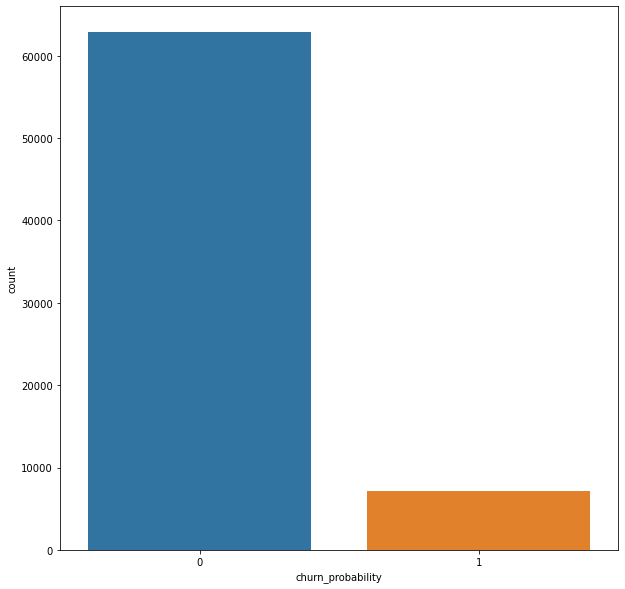

In [27]:
plt.figure(figsize=(10,10))
sns.countplot('churn_probability',data=df)

In [28]:
#creating dependent and independent variable
x=df.drop(['id','circle_id','churn_probability'],axis=1)
y=df['churn_probability']

In [29]:
x.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,date_of_last_rech_8_year,date_of_last_rech_data_6_Day,date_of_last_rech_data_6_month,date_of_last_rech_data_6_year,date_of_last_rech_data_7_Day,date_of_last_rech_data_7_month,date_of_last_rech_data_7_year,date_of_last_rech_data_8_Day,date_of_last_rech_data_8_month,date_of_last_rech_data_8_year
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,2014,30,6,2014,31,7,2014,31,8,2014
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,2014,30,6,2014,8,7,2014,31,8,2014
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,2014,30,6,2014,31,7,2014,31,8,2014
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,2014,30,6,2014,31,7,2014,31,8,2014
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,2014,25,6,2014,23,7,2014,20,8,2014


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Model Building

# Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
lrpred=lr.predict(x_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [109]:
print(accuracy_score(y_test,lrpred))
print(confusion_matrix(y_test,lrpred))
print(classification_report(y_test,lrpred))

0.9058571428571428
[[18677   168]
 [ 1809   346]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18845
           1       0.67      0.16      0.26      2155

    accuracy                           0.91     21000
   macro avg       0.79      0.58      0.60     21000
weighted avg       0.89      0.91      0.88     21000



In [38]:
cf_matrix=confusion_matrix(y_test,lrpred)

<AxesSubplot:>

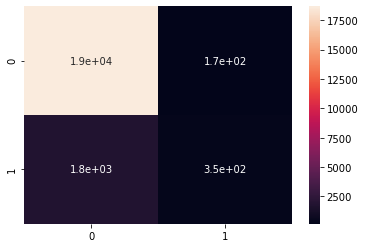

In [39]:
sns.heatmap(cf_matrix,annot=True)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
# checking the accuracy on training data
lrpred_train=lr.predict(x_train)
training_data_accuracy = accuracy_score(lrpred_train,y_train)
print('Training Dataset Accuracy',training_data_accuracy)

Training Dataset Accuracy 0.9072430049592849


- As we have checked Training and test data Accuracy score we infer that this is Genralized model
- When model has Low Bias(Traning score) and Low Variance(Test score) we called that model as a Genralized model 

In [100]:
from sklearn.metrics import auc,roc_curve

In [101]:
lr_fpr,lr_tpr,threshold=roc_curve(y_test,lrpred)
auc_logistic=auc(lr_fpr,lr_tpr)

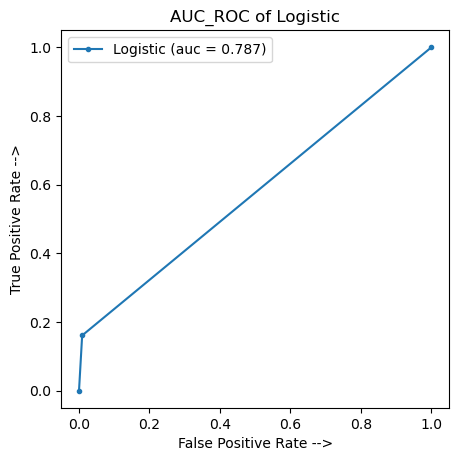

In [131]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr,lr_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('AUC_ROC of Logistic')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Doing Scaling on data set

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [44]:
x_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,date_of_last_rech_8_year,date_of_last_rech_data_6_Day,date_of_last_rech_data_6_month,date_of_last_rech_data_6_year,date_of_last_rech_data_7_Day,date_of_last_rech_data_7_month,date_of_last_rech_data_7_year,date_of_last_rech_data_8_Day,date_of_last_rech_data_8_month,date_of_last_rech_data_8_year
61787,0.0,0.0,0.0,373.161,468.636,679.900,60.03,98.26,62.64,658.93,...,2014,30,6,2014,31,7,2014,31,8,2014
19961,0.0,0.0,0.0,81.812,88.382,55.468,0.00,0.00,0.00,0.00,...,2014,29,6,2014,29,7,2014,27,8,2014
11040,0.0,0.0,0.0,366.437,264.586,247.665,47.66,34.06,115.89,203.21,...,2014,30,6,2014,31,7,2014,31,8,2014
27673,0.0,0.0,0.0,328.054,53.221,42.170,368.18,43.73,10.70,173.51,...,2014,30,6,2014,31,7,2014,31,8,2014
22876,0.0,0.0,0.0,59.990,66.337,75.979,8.59,31.08,34.46,48.76,...,2014,30,6,2014,31,7,2014,31,8,2014


In [45]:
X_train_scale=scaler.fit_transform(x_train)
X_test_scale=scaler.transform(x_test)

In [46]:
X_train_scale

array([[ 0.        ,  0.        ,  0.        , ...,  0.44411116,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.1411649 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.44411116,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.29779215,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.44411116,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.44411116,
         0.        ,  0.        ]])

In [47]:
X_test_scale

array([[ 0.        ,  0.        ,  0.        , ...,  0.44411116,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.29779215,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.44411116,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -2.33595011,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.44411116,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -2.33595011,
         0.        ,  0.        ]])

# Again Building Logistic model after scaling

In [48]:
lr.fit(X_train_scale,y_train)

LogisticRegression()

In [49]:
lrscaled_pred=lr.predict(X_test_scale)

In [110]:
print(accuracy_score(y_test,lrscaled_pred))
print(confusion_matrix(y_test,lrscaled_pred))
print(classification_report(y_test,lrscaled_pred))

0.9128571428571428
[[18610   235]
 [ 1595   560]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18845
           1       0.70      0.26      0.38      2155

    accuracy                           0.91     21000
   macro avg       0.81      0.62      0.67     21000
weighted avg       0.90      0.91      0.89     21000



In [51]:
# checking the accuracy on training data
lrscaled_pred_train=lr.predict(X_train_scale)
training_scaleddata_accuracy = accuracy_score(lrscaled_pred_train,y_train)
print('Training Dataset Accuracy',training_scaleddata_accuracy)

Training Dataset Accuracy 0.915549296924427


In [107]:
sclr_fpr,sclr_tpr,threshold=roc_curve(y_test,lrscaled_pred)
auc_logistic=auc(sclr_fpr,sclr_tpr)

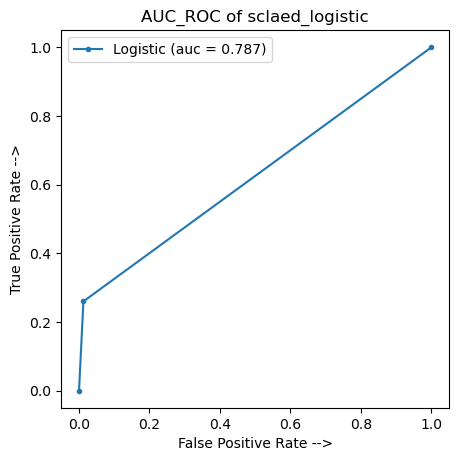

In [129]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(sclr_fpr,sclr_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('AUC_ROC of sclaed_logistic')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Here we doing feature selection for model building

In [52]:
# Use mutual info classifier for feature selection
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.00000000e+00, 6.89919740e-04, 1.95882072e-03, 7.91177227e-03,
       2.32854792e-02, 8.76029214e-02, 5.04460178e-03, 1.72551119e-02,
       5.85374726e-02, 5.83693862e-03, 2.07521511e-02, 7.65797972e-02,
       4.28616661e-03, 7.32803410e-03, 1.51621121e-02, 2.54573671e-03,
       7.69860667e-03, 1.30589662e-02, 1.21086995e-02, 2.79062234e-02,
       7.69763288e-02, 1.27580836e-02, 3.47360674e-02, 9.92081743e-02,
       6.93100246e-03, 1.35501519e-02, 2.58612348e-02, 0.00000000e+00,
       1.78957493e-03, 5.64934184e-03, 1.18009515e-02, 3.88042137e-02,
       1.01672694e-01, 1.89453259e-03, 3.69653785e-03, 1.36376820e-02,
       1.99683673e-03, 4.06744470e-03, 2.50430936e-02, 9.86473404e-05,
       4.31746845e-03, 7.54880266e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08402627e-03, 7.59795250e-03, 3.29294320e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.84963973e-04,
       4.73729175e-03, 2.11431083e-02, 1.10945555e-03, 0.00000000e+00,
      

In [53]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

total_ic_mou_8      0.129954
loc_ic_mou_8        0.127443
loc_ic_t2m_mou_8    0.122514
total_og_mou_8      0.103187
loc_og_mou_8        0.101673
                      ...   
std_og_t2c_mou_8    0.000000
std_og_t2c_mou_7    0.000000
std_og_t2c_mou_6    0.000000
loc_og_t2c_mou_6    0.000000
isd_ic_mou_6        0.000000
Length: 187, dtype: float64

<AxesSubplot:>

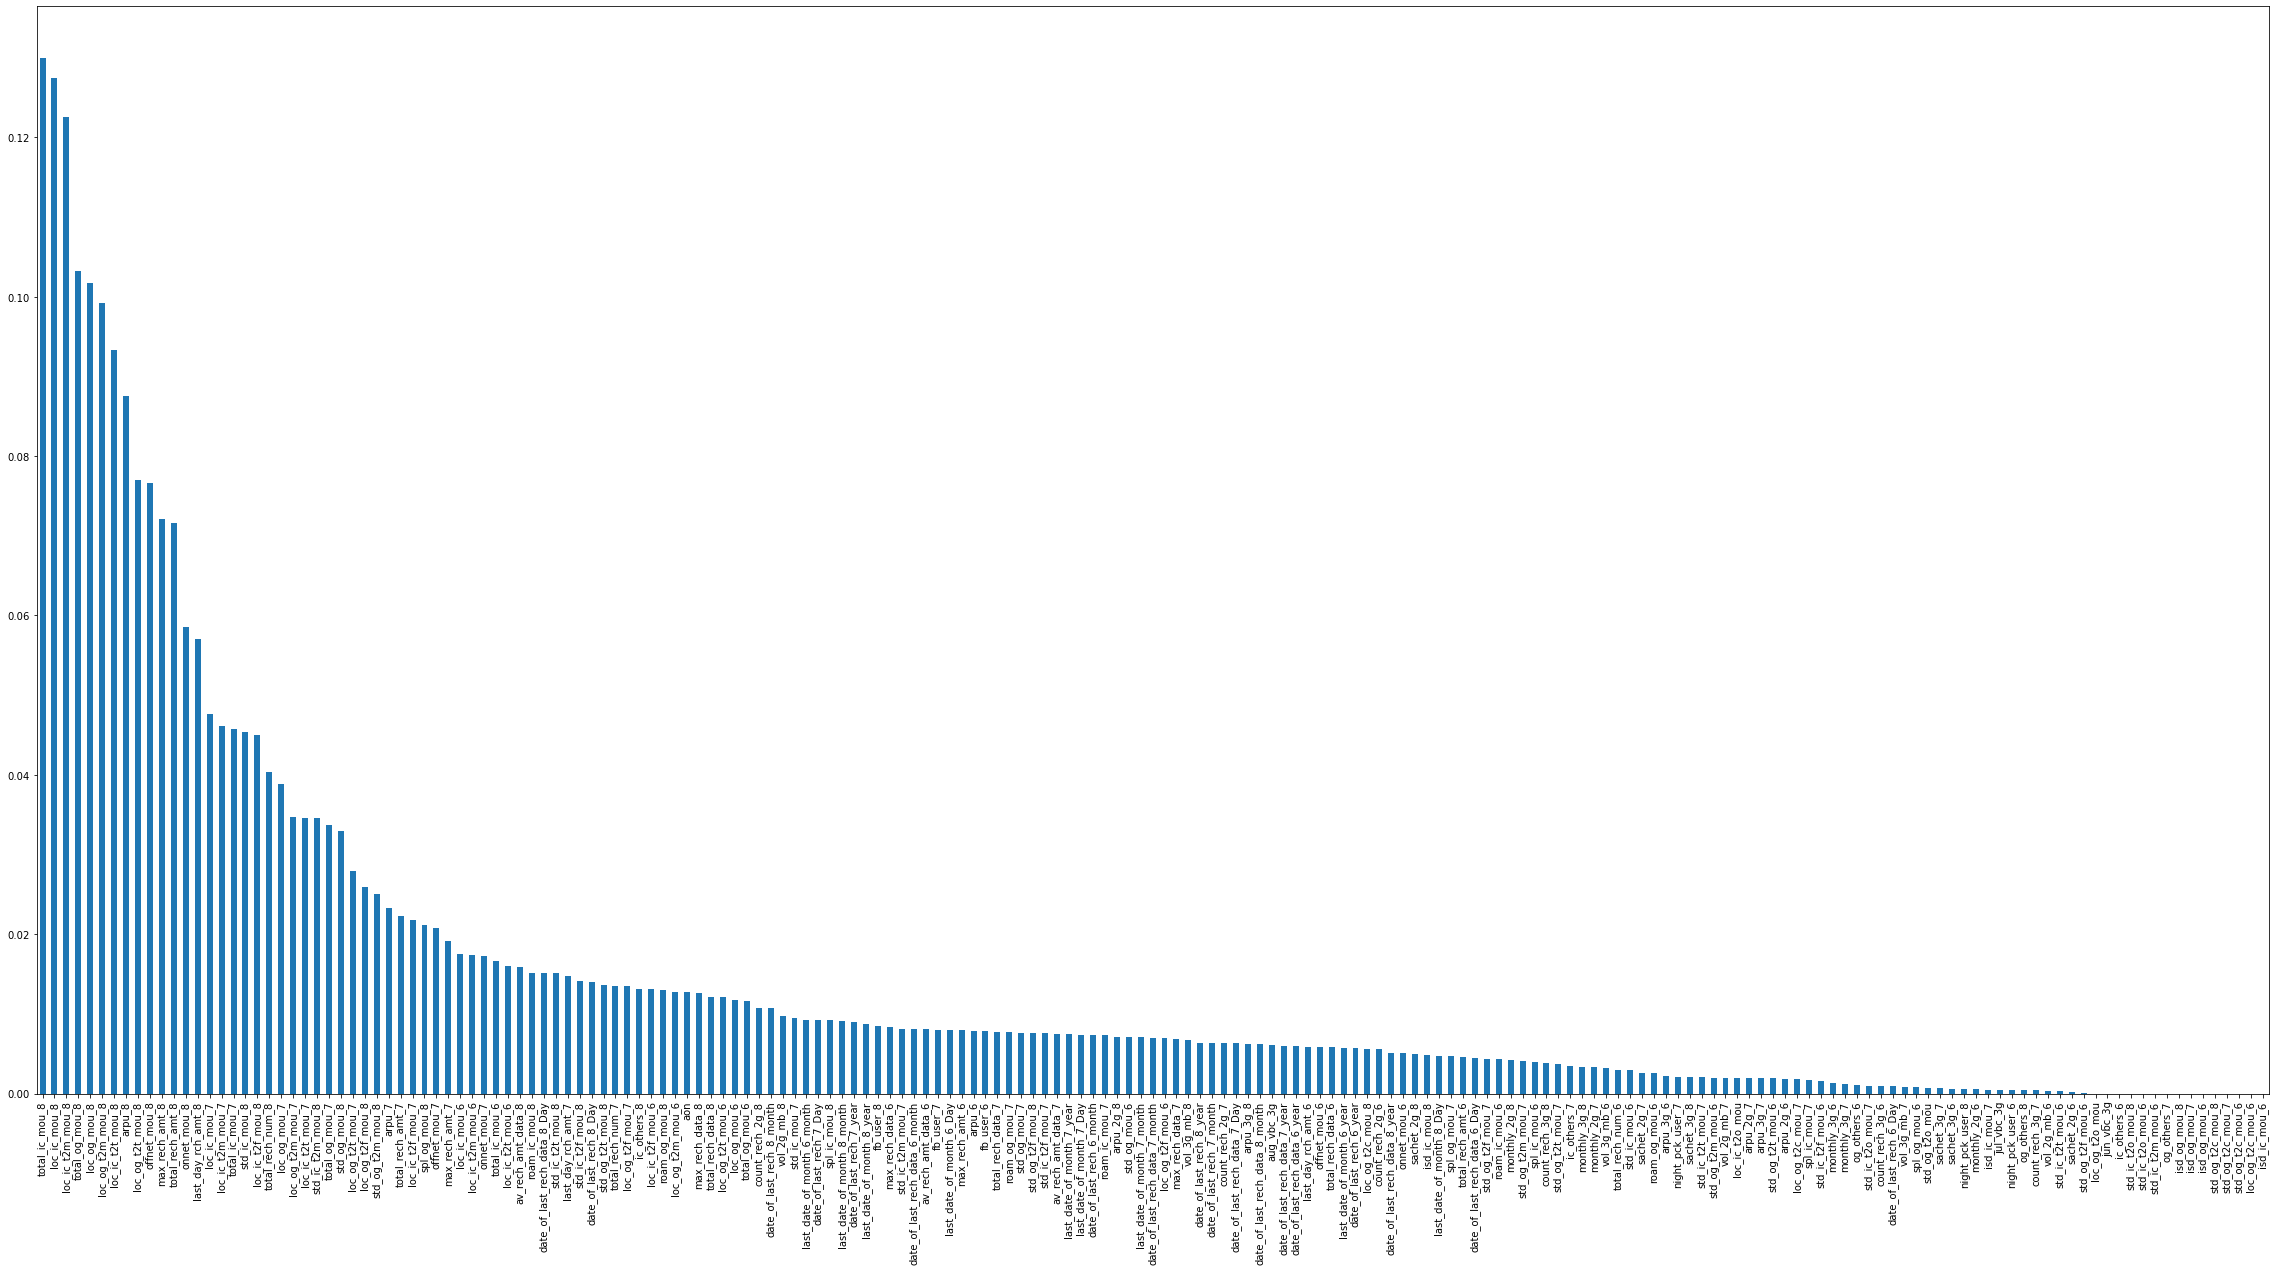

In [54]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(40,20))

# Select Top Features

In [55]:
from sklearn.feature_selection import SelectKBest

In [56]:
sel_top_cols=SelectKBest(mutual_info_classif,k=15)
sel_top_cols.fit(x_train,y_train)
x_train.columns[sel_top_cols.get_support()]

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8'],
      dtype='object')

In [57]:
top_feature=['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8']

In [58]:
# add target variable
top_feature=['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8','churn_probability']

In [59]:
top_feature

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'churn_probability']

# take data of top features

In [60]:
top_featuredata=df.loc[:,top_feature]

In [61]:
top_featuredata.head()

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,churn_probability
0,7.527,1.29,2.33,0.28,2.33,2.61,3.63,7.79,16.91,24.71,15.18,40.56,10,10,0,0
1,42.953,0.00,30.89,0.00,0.00,0.00,31.66,10.53,11.09,25.03,0.00,25.04,50,50,0,0
2,0.000,0.00,0.00,0.00,0.00,0.00,0.00,6.49,23.51,30.01,6.38,36.64,0,0,0,0
3,111.095,0.00,50.23,0.00,23.63,23.63,53.84,23.88,57.14,81.03,2.81,83.84,130,50,50,0
4,101.565,6.13,9.63,6.13,4.61,15.76,15.76,2.66,19.49,28.31,0.00,28.31,122,30,30,0


# building model on top selected features

In [62]:
X=top_featuredata.drop('churn_probability',axis=1)
Y=top_featuredata['churn_probability']

In [63]:
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8
0,7.527,1.29,2.33,0.28,2.33,2.61,3.63,7.79,16.91,24.71,15.18,40.56,10,10,0
1,42.953,0.00,30.89,0.00,0.00,0.00,31.66,10.53,11.09,25.03,0.00,25.04,50,50,0
2,0.000,0.00,0.00,0.00,0.00,0.00,0.00,6.49,23.51,30.01,6.38,36.64,0,0,0
3,111.095,0.00,50.23,0.00,23.63,23.63,53.84,23.88,57.14,81.03,2.81,83.84,130,50,50
4,101.565,6.13,9.63,6.13,4.61,15.76,15.76,2.66,19.49,28.31,0.00,28.31,122,30,30


In [64]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

# Spliting the Data using train test split

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr=LogisticRegression()

In [68]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [69]:
topf_lrpred=lr.predict(X_test)

In [113]:
print(accuracy_score(Y_test,topf_lrpred))
print(confusion_matrix(Y_test,topf_lrpred))
print(classification_report(Y_test,topf_lrpred))

0.8973333333333333
[[18811    34]
 [ 2122    33]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18845
           1       0.49      0.02      0.03      2155

    accuracy                           0.90     21000
   macro avg       0.70      0.51      0.49     21000
weighted avg       0.86      0.90      0.85     21000



In [71]:
cf_matrix=confusion_matrix(Y_test,topf_lrpred)

<AxesSubplot:>

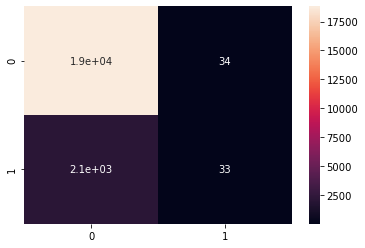

In [72]:
sns.heatmap(cf_matrix,annot=True)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
# checking the accuracy on training data
topf_lrpred_train=lr.predict(X_train)
training_data_accuracy = accuracy_score(topf_lrpred_train,Y_train)
print('Training Dataset Accuracy',training_data_accuracy)

Training Dataset Accuracy 0.8987326271964734


- we got almost same score of train and test as above we do with scaling and with feature selection, but the comman thing between them is our mode is Genralized model

In [114]:
topflr_fpr,topflr_tpr,threshold=roc_curve(Y_test,topf_lrpred)
auc_logistic=auc(topflr_fpr,topflr_tpr)

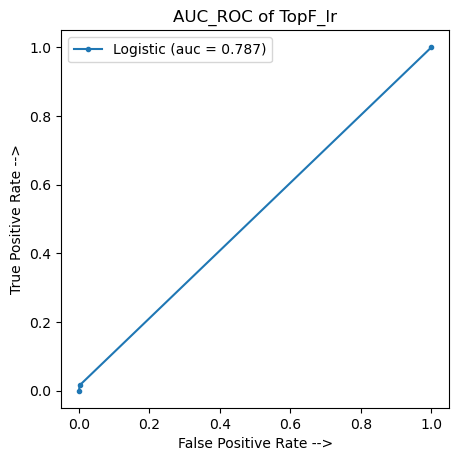

In [128]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(topflr_fpr,topflr_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('AUC_ROC of TopF_lr')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Randomforest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [76]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
# accuracy score and classification report of the Random Forest
rfc_pred= rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[18492   353]
 [  878  1277]]
0.9413809523809524
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18845
           1       0.78      0.59      0.67      2155

    accuracy                           0.94     21000
   macro avg       0.87      0.79      0.82     21000
weighted avg       0.94      0.94      0.94     21000



In [78]:
# checking the accuracy on training data
rfc_pred_train = rfc.predict(x_train)
training_data_accuracy = accuracy_score(rfc_pred_train,y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.9999795914202331


In [126]:
rfc_fpr,rfc_tpr,threshold=roc_curve(y_test,rfc_pred)
auc_logistic=auc(rfc_fpr,rfc_tpr)

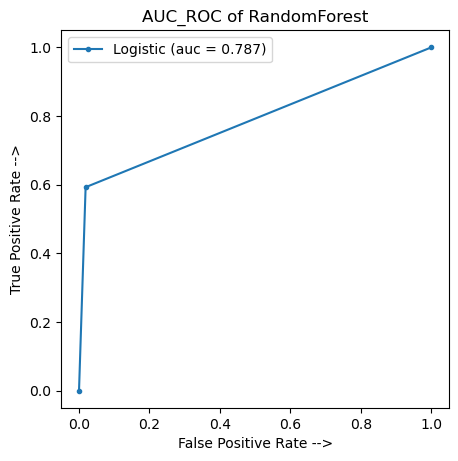

In [127]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr,rfc_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('AUC_ROC of RandomForest')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [80]:
log_class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None, shuffle=False)

In [81]:
clf = GridSearchCV(log_class, grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [82]:
clf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [83]:
kfold_pred = clf.predict(x_test)
print(confusion_matrix(y_test,kfold_pred))
print(accuracy_score(y_test,kfold_pred))
print(classification_report(y_test,kfold_pred))

[[18677   168]
 [ 1807   348]]
0.905952380952381
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18845
           1       0.67      0.16      0.26      2155

    accuracy                           0.91     21000
   macro avg       0.79      0.58      0.61     21000
weighted avg       0.89      0.91      0.88     21000



In [84]:
# checking the accuracy on training data
clf_pred_train = clf.predict(x_train)
training_data_accuracy = accuracy_score(clf_pred_train,y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.9073042306985857


# XGboost

In [85]:
import xgboost
xgbmodel=xgboost.XGBClassifier()

In [86]:
xgbmodel

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [87]:
xgbmodel.fit(x_train,y_train)

[11:38:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xgbpred=xgbmodel.predict(x_test)

In [89]:
print(confusion_matrix(y_test,xgbpred))
print(accuracy_score(y_test,xgbpred))
print(classification_report(y_test,xgbpred))

[[18378   467]
 [  769  1386]]
0.9411428571428572
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.75      0.64      0.69      2155

    accuracy                           0.94     21000
   macro avg       0.85      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000



In [90]:
# checking the accuracy on training data
xgb_train_pred = xgbmodel.predict(x_train)
training_data_accuracy = accuracy_score(xgb_train_pred,y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.9820812669646319


In [120]:
xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,xgbpred)
auc_logistic=auc(xgb_fpr,xgb_tpr)

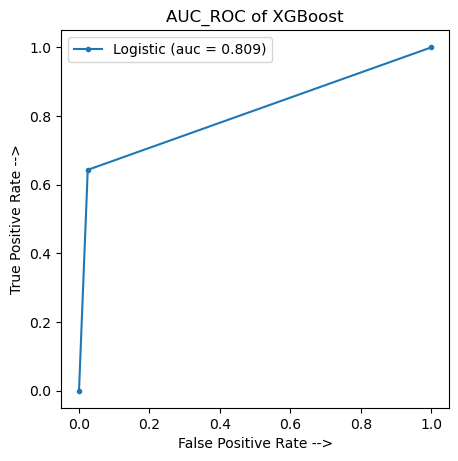

In [124]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xgb_fpr,xgb_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('AUC_ROC of XGBoost')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# XGboost using hypre parameter tuning

In [91]:
# from sklearn.model_selection import RandomizedSearchCV

In [92]:
# Number of tree in random forest
# n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]

# Number of features to consider at every split
# max_features = ['auto','sqrt','log2']

# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10,1000,10)]

# minimum number of samples required to split a node
# min_samples_split = [2,5,10,14]

# minimum number of sample required at each leaf node
# min_samples_leaf = [1,2,4,6,8]


# Create a random grid
# random_grid = {"n_estimators" : n_estimators,
#             "max_features" : max_features,
#             "max_depth"    : max_depth,
#             "min_samples_split" : min_samples_split,
#             "min_samples_leaf"  : min_samples_leaf,
#             "criterion":['entropy','gini']}
# print(random_grid)

In [93]:
# rs=RandomForestClassifier()
# rs_random=RandomizedSearchCV(estimator=rs,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

# fir the randomized model
# rs_random.fit(x_train,y_train)

# AutoML Model

In [94]:
from flaml import AutoML

In [95]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1200,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "iris.log",
}

In [96]:
automl.fit(x_train,y_train,**automl_settings)

[flaml.automl: 05-12 11:39:13] {2068} INFO - task = classification
[flaml.automl: 05-12 11:39:13] {2070} INFO - Data split method: stratified
[flaml.automl: 05-12 11:39:13] {2074} INFO - Evaluation method: holdout
[flaml.automl: 05-12 11:39:14] {2155} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-12 11:39:14] {2248} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-12 11:39:14] {2501} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-12 11:39:15] {2616} INFO - Estimated sufficient time budget=38718s. Estimated necessary time budget=892s.
[flaml.automl: 05-12 11:39:15] {2663} INFO -  at 5.0s,	estimator lgbm's best error=0.1018,	best estimator lgbm's best error=0.1018
[flaml.automl: 05-12 11:39:15] {2501} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-12 11:39:15] {2663} INFO -  at 5.5s,	estimator lgbm's best error=0.1018,	best estimator lgbm's best error=0.1018
[flaml.automl: 

[flaml.automl: 05-12 11:39:28] {2501} INFO - iteration 35, current learner rf
[flaml.automl: 05-12 11:39:29] {2663} INFO -  at 19.1s,	estimator rf's best error=0.0614,	best estimator xgboost's best error=0.0600
[flaml.automl: 05-12 11:39:29] {2501} INFO - iteration 36, current learner extra_tree
[flaml.automl: 05-12 11:39:29] {2663} INFO -  at 19.4s,	estimator extra_tree's best error=0.1014,	best estimator xgboost's best error=0.0600
[flaml.automl: 05-12 11:39:29] {2501} INFO - iteration 37, current learner rf
[flaml.automl: 05-12 11:39:29] {2663} INFO -  at 19.7s,	estimator rf's best error=0.0614,	best estimator xgboost's best error=0.0600
[flaml.automl: 05-12 11:39:29] {2501} INFO - iteration 38, current learner rf
[flaml.automl: 05-12 11:39:29] {2663} INFO -  at 19.9s,	estimator rf's best error=0.0588,	best estimator rf's best error=0.0588
[flaml.automl: 05-12 11:39:29] {2501} INFO - iteration 39, current learner rf
[flaml.automl: 05-12 11:39:30] {2663} INFO -  at 20.2s,	estimator r

[flaml.automl: 05-12 11:40:20] {2663} INFO -  at 70.1s,	estimator xgboost's best error=0.0592,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:40:20] {2501} INFO - iteration 75, current learner lgbm
[flaml.automl: 05-12 11:40:21] {2663} INFO -  at 71.4s,	estimator lgbm's best error=0.0600,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:40:21] {2501} INFO - iteration 76, current learner lgbm
[flaml.automl: 05-12 11:40:23] {2663} INFO -  at 73.0s,	estimator lgbm's best error=0.0600,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:40:23] {2501} INFO - iteration 77, current learner xgboost
[flaml.automl: 05-12 11:40:24] {2663} INFO -  at 74.2s,	estimator xgboost's best error=0.0592,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:40:24] {2501} INFO - iteration 78, current learner rf
[flaml.automl: 05-12 11:40:25] {2663} INFO -  at 75.8s,	estimator rf's best error=0.0581,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:4

[flaml.automl: 05-12 11:41:29] {2663} INFO -  at 139.9s,	estimator extra_tree's best error=0.1014,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:41:29] {2501} INFO - iteration 114, current learner lgbm
[flaml.automl: 05-12 11:41:31] {2663} INFO -  at 141.3s,	estimator lgbm's best error=0.0600,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:41:31] {2501} INFO - iteration 115, current learner lgbm
[flaml.automl: 05-12 11:41:33] {2663} INFO -  at 143.4s,	estimator lgbm's best error=0.0600,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:41:33] {2501} INFO - iteration 116, current learner xgboost
[flaml.automl: 05-12 11:41:37] {2663} INFO -  at 147.6s,	estimator xgboost's best error=0.0592,	best estimator rf's best error=0.0581
[flaml.automl: 05-12 11:41:37] {2501} INFO - iteration 117, current learner rf
[flaml.automl: 05-12 11:41:43] {2663} INFO -  at 153.5s,	estimator rf's best error=0.0581,	best estimator rf's best error=0.0581
[flaml.automl

[flaml.automl: 05-12 11:42:50] {2501} INFO - iteration 152, current learner xgb_limitdepth
[flaml.automl: 05-12 11:42:52] {2663} INFO -  at 222.1s,	estimator xgb_limitdepth's best error=0.0602,	best estimator rf's best error=0.0575
[flaml.automl: 05-12 11:42:52] {2501} INFO - iteration 153, current learner xgb_limitdepth
[flaml.automl: 05-12 11:42:53] {2663} INFO -  at 223.2s,	estimator xgb_limitdepth's best error=0.0602,	best estimator rf's best error=0.0575
[flaml.automl: 05-12 11:42:53] {2501} INFO - iteration 154, current learner lgbm
[flaml.automl: 05-12 11:42:54] {2663} INFO -  at 224.5s,	estimator lgbm's best error=0.0600,	best estimator rf's best error=0.0575
[flaml.automl: 05-12 11:42:54] {2501} INFO - iteration 155, current learner xgb_limitdepth
[flaml.automl: 05-12 11:42:56] {2663} INFO -  at 226.0s,	estimator xgb_limitdepth's best error=0.0602,	best estimator rf's best error=0.0575
[flaml.automl: 05-12 11:42:56] {2501} INFO - iteration 156, current learner xgb_limitdepth
[

[flaml.automl: 05-12 11:44:24] {2663} INFO -  at 314.2s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:44:24] {2501} INFO - iteration 188, current learner rf
[flaml.automl: 05-12 11:44:28] {2663} INFO -  at 318.8s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:44:28] {2501} INFO - iteration 189, current learner rf
[flaml.automl: 05-12 11:44:32] {2663} INFO -  at 322.6s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:44:32] {2501} INFO - iteration 190, current learner xgb_limitdepth
[flaml.automl: 05-12 11:44:41] {2663} INFO -  at 332.0s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:44:41] {2501} INFO - iteration 191, current learner rf
[flaml.automl: 05-12 11:44:43] {2663} INFO -  at 333.7s,	estimator rf's best error=0

[flaml.automl: 05-12 11:46:25] {2501} INFO - iteration 223, current learner xgb_limitdepth
[flaml.automl: 05-12 11:46:27] {2663} INFO -  at 437.9s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:46:27] {2501} INFO - iteration 224, current learner lgbm
[flaml.automl: 05-12 11:46:43] {2663} INFO -  at 453.7s,	estimator lgbm's best error=0.0596,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:46:43] {2501} INFO - iteration 225, current learner rf
[flaml.automl: 05-12 11:46:49] {2663} INFO -  at 459.5s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:46:49] {2501} INFO - iteration 226, current learner rf
[flaml.automl: 05-12 11:46:51] {2663} INFO -  at 461.5s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:46:51] {2501} INFO - iteration 227, current learner rf
[flaml.automl

[flaml.automl: 05-12 11:48:12] {2663} INFO -  at 543.0s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:48:12] {2501} INFO - iteration 259, current learner extra_tree
[flaml.automl: 05-12 11:48:14] {2663} INFO -  at 544.7s,	estimator extra_tree's best error=0.0600,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:48:14] {2501} INFO - iteration 260, current learner xgb_limitdepth
[flaml.automl: 05-12 11:48:19] {2663} INFO -  at 549.1s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:48:19] {2501} INFO - iteration 261, current learner extra_tree
[flaml.automl: 05-12 11:48:20] {2663} INFO -  at 550.8s,	estimator extra_tree's best error=0.0600,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:48:20] {2501} INFO - iteration 262, current learner extra_tree
[flaml.automl: 05-12 11:48:22] {2663} INFO -

[flaml.automl: 05-12 11:49:49] {2663} INFO -  at 639.5s,	estimator extra_tree's best error=0.0600,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:49:49] {2501} INFO - iteration 294, current learner xgb_limitdepth
[flaml.automl: 05-12 11:49:53] {2663} INFO -  at 643.5s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:49:53] {2501} INFO - iteration 295, current learner extra_tree
[flaml.automl: 05-12 11:49:54] {2663} INFO -  at 644.3s,	estimator extra_tree's best error=0.0600,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:49:54] {2501} INFO - iteration 296, current learner xgb_limitdepth
[flaml.automl: 05-12 11:49:59] {2663} INFO -  at 649.2s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:49:59] {2501} INFO - iteration 297, current learner extra_tree
[flaml.automl: 05-12 11:50:02] {2663} IN

[flaml.automl: 05-12 11:51:56] {2663} INFO -  at 766.1s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:51:56] {2501} INFO - iteration 330, current learner extra_tree
[flaml.automl: 05-12 11:51:58] {2663} INFO -  at 768.5s,	estimator extra_tree's best error=0.0600,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:51:58] {2501} INFO - iteration 331, current learner extra_tree
[flaml.automl: 05-12 11:51:59] {2663} INFO -  at 769.8s,	estimator extra_tree's best error=0.0600,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:51:59] {2501} INFO - iteration 332, current learner rf
[flaml.automl: 05-12 11:52:06] {2663} INFO -  at 776.4s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:52:06] {2501} INFO - iteration 333, current learner extra_tree
[flaml.automl: 05-12 11:52:08] {2663} INFO -  at 778.8s,	estimator extra_tree's 

[flaml.automl: 05-12 11:53:22] {2501} INFO - iteration 365, current learner xgb_limitdepth
[flaml.automl: 05-12 11:53:24] {2663} INFO -  at 854.4s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:53:24] {2501} INFO - iteration 366, current learner rf
[flaml.automl: 05-12 11:53:27] {2663} INFO -  at 857.4s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:53:27] {2501} INFO - iteration 367, current learner rf
[flaml.automl: 05-12 11:53:33] {2663} INFO -  at 863.5s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:53:33] {2501} INFO - iteration 368, current learner xgb_limitdepth
[flaml.automl: 05-12 11:53:34] {2663} INFO -  at 864.9s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:53:34] {2501} INFO - iteration 369, current lear

[flaml.automl: 05-12 11:55:04] {2501} INFO - iteration 401, current learner xgb_limitdepth
[flaml.automl: 05-12 11:55:09] {2663} INFO -  at 959.7s,	estimator xgb_limitdepth's best error=0.0573,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:55:09] {2501} INFO - iteration 402, current learner xgboost
[flaml.automl: 05-12 11:55:13] {2663} INFO -  at 963.4s,	estimator xgboost's best error=0.0579,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:55:13] {2501} INFO - iteration 403, current learner extra_tree
[flaml.automl: 05-12 11:55:16] {2663} INFO -  at 966.3s,	estimator extra_tree's best error=0.0588,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:55:16] {2501} INFO - iteration 404, current learner xgboost
[flaml.automl: 05-12 11:55:19] {2663} INFO -  at 969.7s,	estimator xgboost's best error=0.0579,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:55:19] {2501} INFO - iteration 405, 

[flaml.automl: 05-12 11:57:16] {2663} INFO -  at 1086.9s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:57:16] {2501} INFO - iteration 437, current learner rf
[flaml.automl: 05-12 11:57:19] {2663} INFO -  at 1090.0s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:57:19] {2501} INFO - iteration 438, current learner rf
[flaml.automl: 05-12 11:57:22] {2663} INFO -  at 1092.7s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:57:22] {2501} INFO - iteration 439, current learner rf
[flaml.automl: 05-12 11:57:27] {2663} INFO -  at 1097.9s,	estimator rf's best error=0.0575,	best estimator xgb_limitdepth's best error=0.0573
[flaml.automl: 05-12 11:57:27] {2501} INFO - iteration 440, current learner extra_tree
[flaml.automl: 05-12 11:57:30] {2663} INFO -  at 1100.8s,	estimator extra_tree's best error=0.0588,	best est

In [97]:
automl_pred=automl.predict(x_test)

In [98]:
# accuracy score and classification report of the XGboostmodel
print(confusion_matrix(y_test,automl_pred))
print(accuracy_score(y_test,automl_pred))
print(classification_report(y_test,automl_pred))

[[18372   473]
 [  720  1435]]
0.9431904761904762
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     18845
           1       0.75      0.67      0.71      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.82      0.84     21000
weighted avg       0.94      0.94      0.94     21000



In [99]:
# checking the accuracy on training data
automl_train_pred = automl.predict(x_train)
training_data_accuracy = accuracy_score(automl_train_pred,y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.9683462927814853


In [116]:
automl_fpr,automl_tpr,threshold=roc_curve(y_test,automl_pred)
auc_logistic=auc(automl_fpr,automl_tpr)

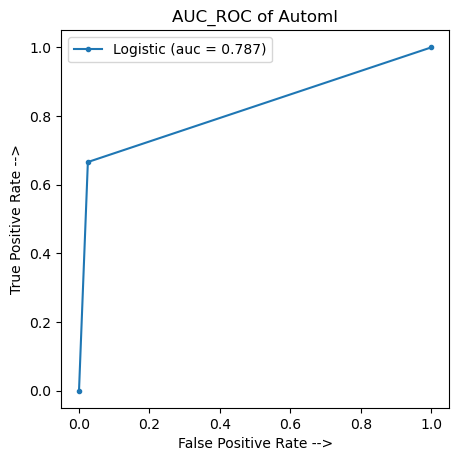

In [132]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(automl_fpr,automl_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('AUC_ROC of Automl')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

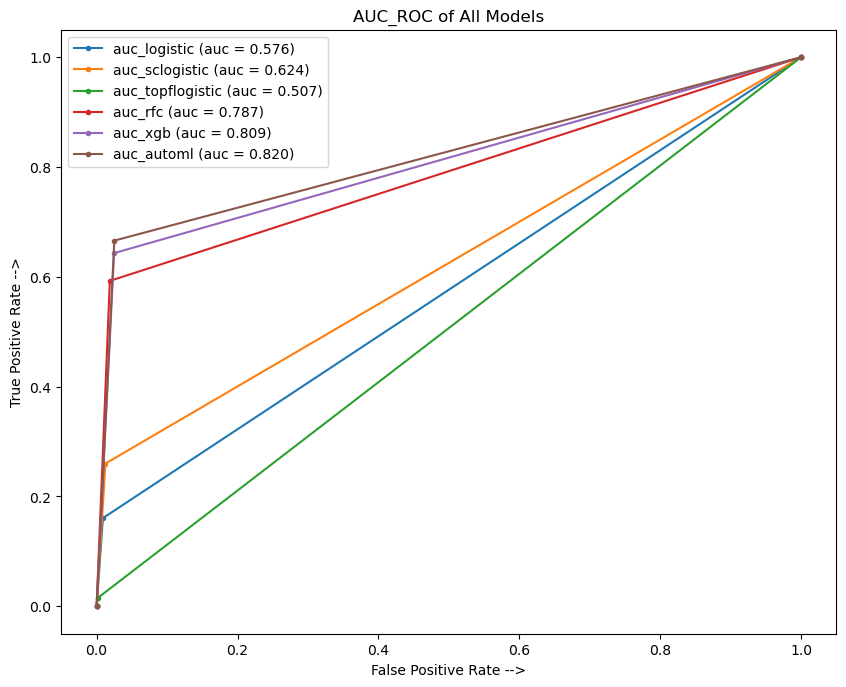

In [143]:
lr_fpr,lr_tpr,threshold=roc_curve(y_test,lrpred)
auc_logistic=auc(lr_fpr,lr_tpr)

sclr_fpr,sclr_tpr,threshold=roc_curve(y_test,lrscaled_pred)
auc_sclogistic=auc(sclr_fpr,sclr_tpr)

topflr_fpr,topflr_tpr,threshold=roc_curve(Y_test,topf_lrpred)
auc_topflogistic=auc(topflr_fpr,topflr_tpr)

rfc_fpr,rfc_tpr,threshold=roc_curve(y_test,rfc_pred)
auc_rfc=auc(rfc_fpr,rfc_tpr)

xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,xgbpred)
auc_xgb=auc(xgb_fpr,xgb_tpr)

automl_fpr,automl_tpr,threshold=roc_curve(y_test,automl_pred)
auc_automl=auc(automl_fpr,automl_tpr)

plt.figure(figsize=(10, 8), dpi=100)
plt.plot(lr_fpr,lr_tpr, marker='.', label='auc_logistic (auc = %0.3f)' % auc_logistic)
plt.plot(sclr_fpr,sclr_tpr, marker='.', label='auc_sclogistic (auc = %0.3f)' % auc_sclogistic)
plt.plot(topflr_fpr,topflr_tpr, marker='.', label='auc_topflogistic (auc = %0.3f)' % auc_topflogistic)
plt.plot(rfc_fpr,rfc_tpr, marker='.', label='auc_rfc (auc = %0.3f)' % auc_rfc)
plt.plot(xgb_fpr,xgb_tpr, marker='.', label='auc_xgb (auc = %0.3f)' % auc_xgb)
plt.plot(automl_fpr,automl_tpr, marker='.', label='auc_automl (auc = %0.3f)' % auc_automl)

plt.title('AUC_ROC of All Models')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')


plt.legend()

plt.show()

In [144]:
Score=pd.read_excel('Model And thier scores file.xlsx')

In [145]:
Score

,Models,Scores
0,LogisticRegression,0.9058
1,LogisticRegression_With_Scaling,0.9128
2,LogisticRegression_With_TopFeatures,0.8973
3,Random Forest Classifire,0.9413
4,XGBoost,0.9411
5,AutoML,0.9431
